In [1]:
import findspark

In [2]:
findspark.init('/users/janetteboney/anaconda3/lib/python3.7/site-packages/pyspark')

In [3]:
from pyspark.sql import SparkSession

In [4]:
import pyspark.sql.functions as F

In [5]:
spark_session = SparkSession.builder.appName("Ops").getOrCreate()

In [6]:
df = spark_session.read.csv("heart.csv", inferSchema=True, header=True)

In [7]:
len(df.columns)

14

In [8]:
#define header
header = df.first()

In [9]:
#show header
header

Row(age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.3, slope=0, ca=0, thal=1, target=1)

In [10]:
#look at how the data were defined from inferred schema
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)

In [11]:
#preview top 5 rows of the data
df.show(5)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [12]:
#select just one column
df.select('age').show(5)

+---+
|age|
+---+
| 63|
| 37|
| 41|
| 56|
| 57|
+---+
only showing top 5 rows



In [31]:
#calculate summary statistics
df.describe().show()   

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [41]:
#define dataframe for those with heart disease, women with heart disease, men with heart disease, and 
#calculate summary statistics for women with heart disease
df1 = df.filter(df["target"] == 1)
df2 = df1.filter(df1["sex"] == 0)
df3 = df1.filter(df1["sex"] == 1)
df2.describe().show()   

+-------+------------------+---+------------------+------------------+----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------+
|summary|               age|sex|                cp|          trestbps|            chol|                fbs|           restecg|           thalach|             exang|           oldpeak|             slope|                ca|               thal|target|
+-------+------------------+---+------------------+------------------+----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------+
|  count|                72| 72|                72|                72|              72|                 72|                72|                72|                72|                72|                72|                72|                 72|    72|
|   

In [30]:
#all with total cholesterol over 400mg/dl were women - only half of them had heart disease
df.filter(df["chol"] > 400).show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 65|  0|  2|     140| 417|  1|      0|    157|    0|    0.8|    2|  1|   2|     1|
| 67|  0|  2|     115| 564|  0|      0|    160|    0|    1.6|    1|  0|   3|     1|
| 63|  0|  0|     150| 407|  0|      0|    154|    0|    4.0|    1|  3|   3|     0|
| 56|  0|  0|     134| 409|  0|      0|    150|    1|    1.9|    1|  2|   3|     0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



In [14]:
df.groupBy(["age", "sex", "trestbps", "chol"]).count().orderBy(F.asc("age")).show(10)

+---+---+--------+----+-----+
|age|sex|trestbps|chol|count|
+---+---+--------+----+-----+
| 29|  1|     130| 204|    1|
| 34|  1|     118| 182|    1|
| 34|  0|     118| 210|    1|
| 35|  1|     122| 192|    1|
| 35|  1|     120| 198|    1|
| 35|  0|     138| 183|    1|
| 35|  1|     126| 282|    1|
| 37|  1|     130| 250|    1|
| 37|  0|     120| 215|    1|
| 38|  1|     138| 175|    2|
+---+---+--------+----+-----+
only showing top 10 rows



In [15]:
#create a temporary table
df.createOrReplaceTempView("HEART_DISEASE")

In [36]:
#males with heart disease
male_heart_disease = spark_session.sql("""    
    SELECT
        *
    FROM
        HEART_DISEASE 
    WHERE
        TARGET == 1
    AND SEX == 1
    ORDER BY 
        AGE
""").show(10)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 29|  1|  1|     130| 204|  0|      0|    202|    0|    0.0|    2|  0|   2|     1|
| 34|  1|  3|     118| 182|  0|      0|    174|    0|    0.0|    2|  0|   2|     1|
| 35|  1|  1|     122| 192|  0|      1|    174|    0|    0.0|    2|  0|   2|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 38|  1|  2|     138| 175|  0|      1|    173|    0|    0.0|    2|  4|   2|     1|
| 38|  1|  2|     138| 175|  0|      1|    173|    0|    0.0|    2|  4|   2|     1|
| 39|  1|  2|     140| 321|  0|      0|    182|    0|    0.0|    2|  0|   2|     1|
| 40|  1|  3|     140| 199|  0|      1|    178|    1|    1.4|    2|  0|   3|     1|
| 41|  1|  1|     135| 203|  0|      1|    132|    0|    0.0|    1|  0|   1|

In [37]:
#females with heart disease
female_heart_disease = spark_session.sql("""    
    SELECT
        *
    FROM
        HEART_DISEASE 
    WHERE
        TARGET == 1
    AND SEX == 0
    ORDER BY 
        AGE
""").show(10)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 34|  0|  1|     118| 210|  0|      1|    192|    0|    0.7|    2|  0|   2|     1|
| 35|  0|  0|     138| 183|  0|      1|    182|    0|    1.4|    2|  0|   2|     1|
| 37|  0|  2|     120| 215|  0|      1|    170|    0|    0.0|    2|  0|   2|     1|
| 39|  0|  2|      94| 199|  0|      1|    179|    0|    0.0|    2|  0|   2|     1|
| 39|  0|  2|     138| 220|  0|      1|    152|    0|    0.0|    1|  0|   2|     1|
| 41|  0|  1|     105| 198|  0|      1|    168|    0|    0.0|    2|  1|   2|     1|
| 41|  0|  1|     126| 306|  0|      1|    163|    0|    0.0|    2|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 41|  0|  2|     112| 268|  0|      0|    172|    1|    0.0|    2|  0|   2|

In [18]:
#outputs graphs to notebook
%matplotlib inline

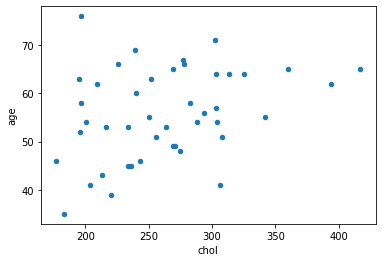

In [44]:
#plot women with heart disease by cholesterol and age whose resting blood pressure is over 120mm Hg
df2[df2.trestbps > 120].toPandas().plot(
    x = "chol",
    y = "age",
    kind = "scatter"
)

In [40]:
#table of men and women with heart disease grouped by sex and age with average choleserol level 
df1.groupBy("sex", "age").avg("chol").orderBy(F.asc("age")).show()

+---+---+------------------+
|sex|age|         avg(chol)|
+---+---+------------------+
|  1| 29|             204.0|
|  1| 34|             182.0|
|  0| 34|             210.0|
|  0| 35|             183.0|
|  1| 35|             192.0|
|  0| 37|             215.0|
|  1| 37|             250.0|
|  1| 38|             175.0|
|  1| 39|             321.0|
|  0| 39|             209.5|
|  1| 40|             199.0|
|  1| 41|             211.8|
|  0| 41|             244.0|
|  1| 42|             237.0|
|  0| 42|             237.0|
|  0| 43|             213.0|
|  1| 43|             269.0|
|  1| 44|232.66666666666666|
|  0| 44|             191.5|
|  1| 45| 258.6666666666667|
+---+---+------------------+
only showing top 20 rows



In [45]:
#men and women with heart disease and average cholesterol and resting blood pressure
df[df.target == 1].groupBy("age", "sex").avg("chol", "trestbps").show()

+---+---+------------------+------------------+
|age|sex|         avg(chol)|     avg(trestbps)|
+---+---+------------------+------------------+
| 62|  1|             219.5|             129.0|
| 69|  1|             234.0|             160.0|
| 58|  1|223.66666666666666|123.33333333333333|
| 71|  0|238.66666666666666|127.33333333333333|
| 48|  1|240.66666666666666|125.33333333333333|
| 54|  0|             254.8|             129.0|
| 56|  0|             294.0|             140.0|
| 42|  0|             237.0|             111.0|
| 41|  0|             244.0|            118.25|
| 64|  0| 313.6666666666667|             150.0|
| 68|  0|             211.0|             120.0|
| 66|  1|             265.0|             140.0|
| 41|  1|             211.8|             121.4|
| 39|  0|             209.5|             116.0|
| 63|  0|             223.5|             137.5|
| 59|  1|             241.6|             148.2|
| 46|  0|             208.0|128.33333333333334|
| 44|  1|232.66666666666666|126.66666666

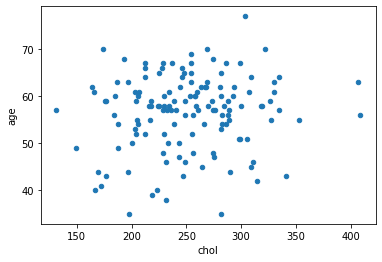

In [22]:
#plot men with heart disease by age and cholesterol whose blood pressure is > 120mm Hg
df3[df3.trestbps > 120].toPandas().plot(
    x = "chol",
    y = "age",
    kind = "scatter"
)

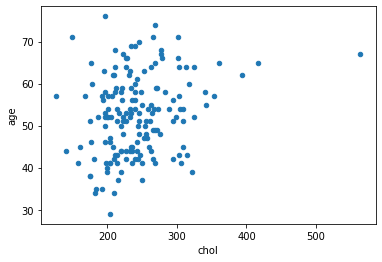

In [23]:
#men and women with heart disease by age and cholesterol
df[df.target == 1].toPandas().plot(
    x = "chol",
    y = "age",
    kind = "scatter"
)

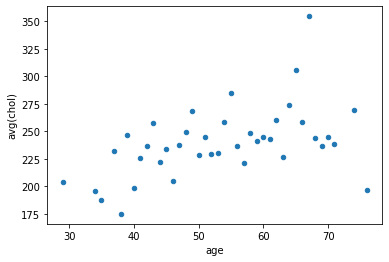

In [54]:
#men and women with heart disease by age and average cholesterol
df[df.target == 1].groupBy("age").avg("chol").toPandas().plot(
    x = "age",
    y = "avg(chol)",
    kind = "scatter"
)

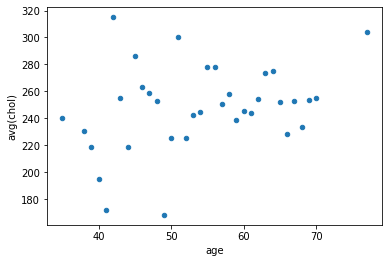

In [55]:
#men and women without heart disease by age and average cholesterol
df[df.target == 0].groupBy("age").avg("chol").toPandas().plot(
    x = "age",
    y = "avg(chol)",
    kind = "scatter"
)

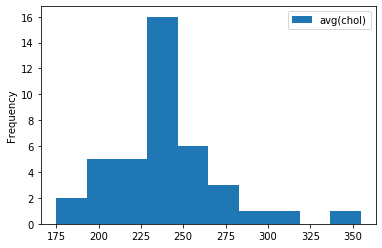

In [56]:
#this is average cholesterol for men and women with heart disease
df1.groupBy("age").avg("chol").toPandas().plot(
    x = "age",
    y = "avg(chol)",
    kind = "hist"
)

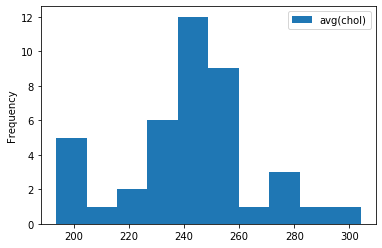

In [55]:
#average cholesterol for men and women with and without heart disease
df.groupBy("age").avg("chol").toPandas().plot(
    x = "age",
    y = "avg(chol)",
    kind = "hist"
)

No correlations were noted below. This initially surprised me, but seems consistent with the tables and plots above.

In [51]:
df.corr("age", "chol")

0.2136779565595619

In [58]:
df.corr("sex", "chol")

-0.1979121741411069

In [60]:
df.corr("chol", "cp")

-0.07690439103320776

In [61]:
df.corr("sex", "target")

-0.28093657550176687

In [62]:
df.corr("chol", "target")

-0.08523910513756904

In [63]:
df.corr("chol", "trestbps")

0.12317420653239061

In [64]:
df.corr("age", "target")

-0.22543871587483838